# Customer Churn Model Building
<br>

### After EDA, Let us build some machine learning models and predict the churn.

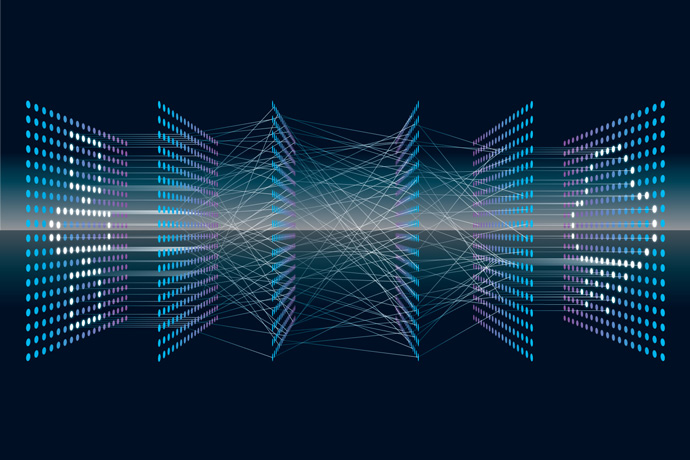
<br>

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


There seems to be an spam feature **Unnamed: 0**, we will drop it.

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
# Droping the Churn feature for model building

x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [5]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

### Train-Test Split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<br>

##### We know this is an imbalanced dataset, so we need to either upscale or downscale the dataset. But before that let us try to build a model just the understand and compare how the model performs before and after the upscaling or downscaling.

<br>

#### Decision Tree Classifier

In [7]:
before_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
before_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [8]:
y_pred=before_dt.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [9]:
before_dt.score(x_test,y_test)

0.7860696517412935

##### Since it is an imbalanced dataset, we shouldnt consider the accuracy score much but consider F1, Precision score and Recall.

In [10]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407



#### The F1, Precision score and Recall all are pretty much in the 70 to 80 range which is quite low.

<br>

## Upsampling and SMOTEENN 


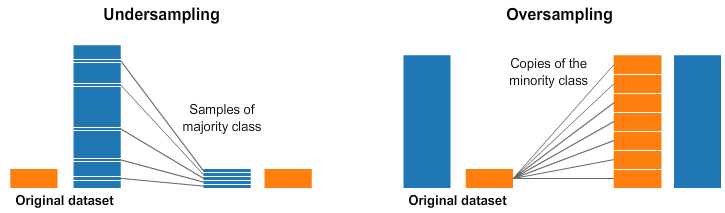


- Over-sampling using SMOTE and cleaning using ENN.
- Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours. More [Here](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)

In [11]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [12]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [13]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [14]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9527085124677558
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       545
           1       0.95      0.96      0.96       618

    accuracy                           0.95      1163
   macro avg       0.95      0.95      0.95      1163
weighted avg       0.95      0.95      0.95      1163



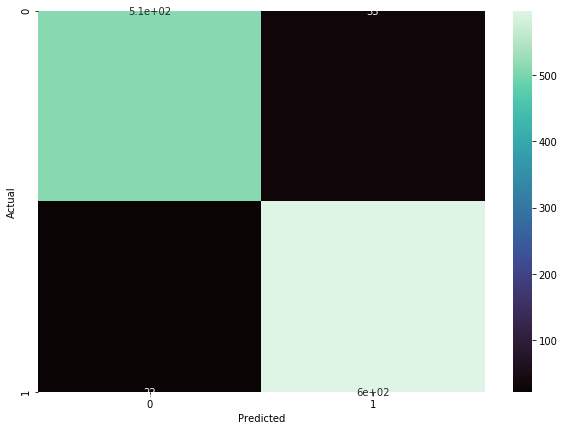

In [15]:
#Confusion Matrix
confusion_matrix = pd.crosstab(yr_test, yr_predict, rownames=['Actual'], colnames=['Predicted'] )
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, cmap = "mako")
plt.show()

In [16]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[512  33]
 [ 22 596]]


<br>

## Before and After SMOTEENN




|Before/After|Precision|Recall|F1-score|
|------------|---------|------|--------|
|Before      |0.78     |0.79  |0.78    |
|After       |0.93     |0.93  |0.93    |
|Difference  |+0.15    |+0.14 |+0.15   |


- Clearly SMOTEENN is giving us better results


<br>

## Random Forest Classifier

### Before SMOTEENN

In [17]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=10, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, n_estimators=10,
                       random_state=100)

In [18]:
y_pred=model_rf.predict(x_test)

In [19]:
model_rf.score(x_test,y_test)

0.8045486851457001

In [20]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.67      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407




### After SMOTEENN

In [21]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [22]:
model_rf_smote=RandomForestClassifier(n_estimators=5, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=5)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=5,
                       random_state=100)

In [23]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [24]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)

0.9481733220050977


In [25]:
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       540
           1       0.94      0.96      0.95       637

    accuracy                           0.95      1177
   macro avg       0.95      0.95      0.95      1177
weighted avg       0.95      0.95      0.95      1177



In [26]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[503  37]
 [ 24 613]]


<br>

## Before and After SMOTEENN




|Before/After|Precision|Recall|F1-score|
|------------|---------|------|--------|
|Before      |0.79     |0.80  |0.79    |
|After       |0.94     |0.94  |0.94    |
|Difference  |+0.15    |+0.14 |+0.15   |

<br>

- **We are getting a better result with SMOTEENN and upsampling.**
- **Random Forest seems to work better than Decision Trees**

<br>

## Prediction using ANN

In [27]:
# Importing Tensorflow and Keras

import tensorflow as tf
from tensorflow import keras

In [28]:
len(xr_train1.columns)

50

### Model Building - Creating a nueral network

In [29]:
#Same number of neurons as columns, so 50
model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(50,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(xr_train1, yr_train1, epochs=100)

Epoch 1/100
148/148 [==============================] - 4s 2ms/step - loss: 1.7383 - accuracy: 0.7867
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8702
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.8568
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9125
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.8723
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8925
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9159
Epoch 8/100
148/148 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8976
Epoch 9/100
148/148 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9254
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 0.2526 - accura

#### The accuracy lies in the region of 0.93 - 0.94 
<br>

In [30]:
yp = model.predict(xr_test1)
yp[:5]

# Since its a sigmoid fuction, the values will lie between 0 and 1.

array([[3.8946313e-01],
       [6.2540072e-01],
       [1.0000000e+00],
       [9.9951774e-01],
       [4.7438488e-07]], dtype=float32)

In [31]:
# We are getting yp as an 2D array, so we will convert it to 0 or 1 using a simple for loop.

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [32]:
y_pred[:10]

[0, 1, 1, 1, 0, 1, 0, 0, 0, 1]

In [33]:
 yr_test1[:10]

120     0
2925    1
5701    1
4893    1
1814    0
4953    1
1780    0
1132    0
1724    0
4923    1
Name: Churn, dtype: int64

In [34]:
# Performance of the overall model

print(classification_report(yr_test1,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       540
           1       0.98      0.90      0.94       637

    accuracy                           0.94      1177
   macro avg       0.94      0.94      0.94      1177
weighted avg       0.94      0.94      0.94      1177



Text(69.0, 0.5, 'Truth')

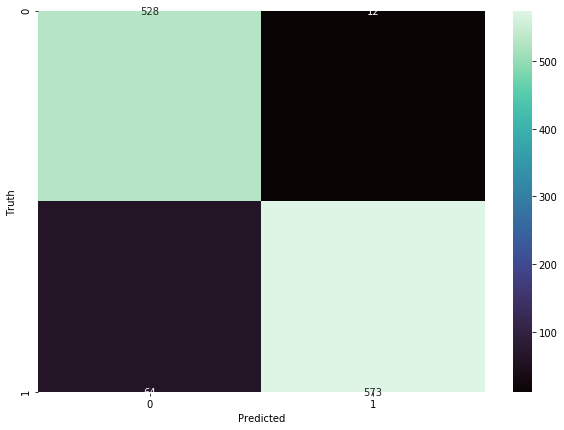

In [35]:
# Confusion matrix and its heatmap

cm = tf.math.confusion_matrix(labels=yr_test1,predictions=y_pred)

plt.figure(figsize = (10,7))
ax = sn.heatmap(cm, annot=True, fmt='d', cmap = "mako")
plt.xlabel('Predicted')
plt.ylabel('Truth')

<br>

## Pickling and Export of the model

#### Random Forest Model With SMOTEENN

In [46]:
import pickle

In [47]:
filename = 'modelrf.sav'

In [48]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [49]:
load_model = pickle.load(open(filename, 'rb'))

In [43]:
#Calling the model to Check
model_score_r1 = load_model.score(xr_test1, yr_test1)

model_score_r1

0.9481733220050977

<br>

## Deployment
<br>

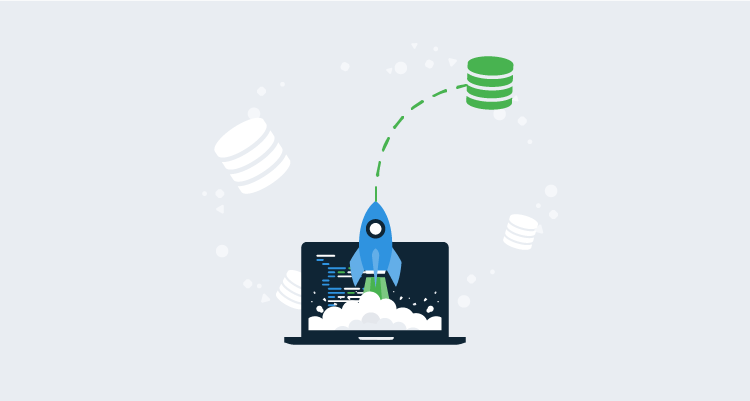